## Inicjalizacja środowiska programistycznego

In [2]:
#Color printing
from termcolor import colored

#General data operations library
import math
import string
from datetime import datetime
import numpy as np

#The tensorflow library
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"
import tensorflow  as tf

#Plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt

#Increase plots font size
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params) 

#append path with python modules
import importlib
import sys
sys.path.append("../modules")
sys.path.append("/home/akalinow/scratch/Zajecia/2023-2024/Lato/Uczenie_maszynowe_2/UczenieMaszynoweII/modules")

#Private functions
import plotting_functions as plf
importlib.reload(plf);

import emnist_functions as emnist_fcn
importlib.reload(emnist_fcn);
#Hide GPU
#tf.config.set_visible_devices([], 'GPU')

2024-03-20 15:13:26.115820: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-20 15:13:26.115845: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-20 15:13:26.116647: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<br/><br/>
<br/><br/>

<h1 align="center">
 Uczenie maszynowe II
</h1>

<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>

<h1 align="right">
Artur Kalinowski <br>
Uniwersytet Warszawski <br>
Wydział Fizyki <br>    
</h1>

Istnieje, niekompletny, zbiór standardowych operacji jakie wykonujemy na różnego typu danych. API Keras dostarcza gotowych 
warstw wykonujących wiele z tych operacji:

```Python

 normalization = tf.keras.layers.Normalization(mean, variance) # Normalizacja danych do średniej mean i wariancji wariance
                                                               # domyślnie mean=0, variance=1
                                                               # normalizacja przebiega dla każdej cechy oddzielnie
                                                               # wymaga ustalenia współczynników normalizacji przez metodę adapt(x)
normalization.adapt(x)                                                             
```
```Python

discretization = tf.keras.layers.Discretization(num_bins, bin_boundaries, output_mode) 
                 # Zamiana zmiennej ciągłej na dyskretną w postaci:
                 # output_mode = int - numer przedziału (wartość domyślna)
                 #               one_hot - wektor typu kodowania gorącojedynkowego
                 # num_bins - liczba przedziałów (wymaga zawołania metody adapt(x))
                 # bin_boundaries - zakresy przedziałów
```

**Proszę:**

* wygenerować zbiór `(n,4)` liczb pochodzących z rozkładu płaskiego w zakresach `[[-5,5],[-4,2],[2,2]]`
* wypisać na ekran wartości minimalne, maksymalne  i średnią cech w zbiorze
* znormalizować dane do zakresu `[0,1]` dla każdej cechy oddzielnie
* wypisać na ekran wartości minimalne, maksymalne  i średnią cech w znormalizowanym zbiorze

In [32]:
n = 10_000
#BEGIN_SOLUTION
x = tf.random.uniform([n, 3])
scales = np.array([[-5,5],[-4,2],[2,2]])
ranges = scales[:,1] - scales[:,0]
x = x * ranges + scales[:,0]
print(colored("min =", "blue"), tf.math.reduce_min(x, axis=0).numpy())
print(colored("mean =", "blue"), tf.math.reduce_mean(x, axis=0).numpy())
print(colored("max =", "blue"), tf.math.reduce_max(x, axis=0).numpy())
print(colored("stddev =", "blue"), tf.math.reduce_std(x, axis=0).numpy()
normalization = tf.keras.layers.Normalization()
normalization.adapt(x)
x = normalization(x)
print(colored("min =", "blue"), tf.math.reduce_min(x, axis=0).numpy())
print(colored("mean =", "blue"), tf.math.reduce_mean(x, axis=0).numpy())
print(colored("max =", "blue"), tf.math.reduce_max(x, axis=0).numpy())
#END_SOLUTION


min = [-4.999964 -3.999656  2.      ]
mean = [ 0.04805842 -1.0023053   2.        ]
max = [4.9994793 1.999958  2.       ]
min = [-1.7373931 -1.7417412  0.       ]
mean = [-2.5939942e-08  2.2602082e-08  0.0000000e+00]
max = [1.7041454 1.7445959 0.       ]


**Proszę:**

* zdyskretyzować dane do 10 przedziałów
* narysować jeden histogram numerów przedziałów dla wszystkich cech
* w histogramie użyć granic przedziałów znalezionych przez `tf.keras.layers.Discretization(...)`

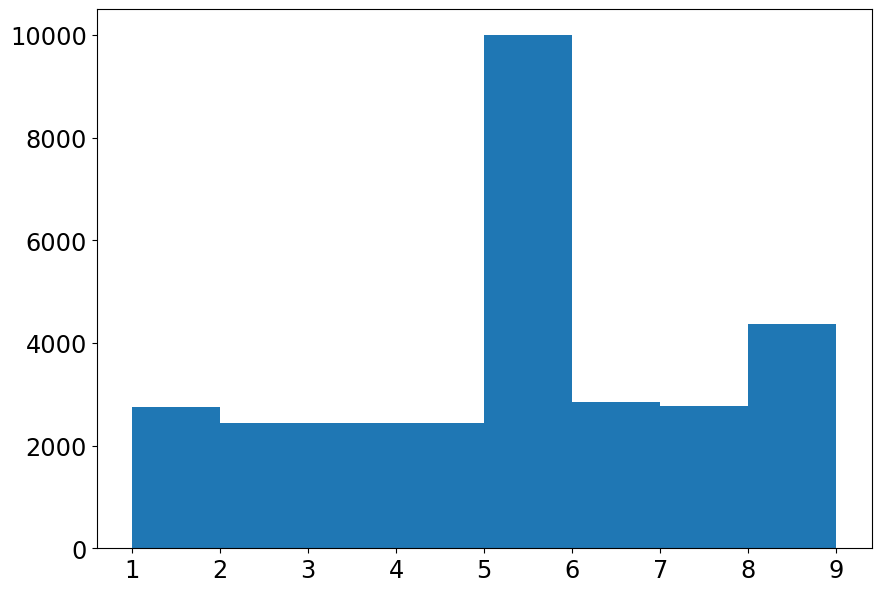

In [46]:
#BEGIN_SOLUTION
discretization = tf.keras.layers.Discretization(num_bins = 10)
discretization.adapt(x)
x = discretization(x)

plt.hist(tf.reshape(shape=(-1,), tensor=x), bins = discretization.bin_boundaries)
#END_SOLUTION
pass

# Zadanie domowe


In [43]:
discretization.bin_boundaries

ListWrapper([1.0, 2.0, 5.0, 5.0, 5.0, 6.0, 7.0, 8.0, 9.0])